In [1]:
# initialisations
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
import random
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
sns.set(
    palette="Paired",
    style='whitegrid',
    color_codes=True,
    rc={"figure.figsize": (12,8)},
)

In [3]:
url='https://drive.google.com/file/d/1Fsl9G_C7ZzRn0VpfpF8CjuXkdC18Y6Vf/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
compas_df = pd.read_csv(url, sep=',')
compas_df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


## Preprocessing

In [17]:
compas_df = compas_df.dropna()

In [18]:
for col in compas_df:
    compas_df = compas_df[compas_df[col] != 'Unknown']

In [19]:
for col in compas_df:
    compas_df = compas_df[compas_df[col] != 'Other']

In [20]:
compas_df['Ethnic_Code_Text'].replace('African-Am', 'African-American', inplace=True)

In [24]:
compas_df.groupby('Ethnic_Code_Text',sort=False).size()

Ethnic_Code_Text
African-American    6544
Caucasian           5178
Asian                 54
Hispanic            1247
Native American       51
dtype: int64

In [22]:
for col in compas_df:
    compas_df = compas_df[compas_df[col] != 'Oriental']

In [23]:
for col in compas_df:
    compas_df = compas_df[compas_df[col] != 'Arabic']

## Descriptive Stats

In [4]:
compas_df.shape

(60843, 28)

In [5]:
compas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

In [6]:
compas_df.describe()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
count,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.0,60843.0
mean,53683.206154,68061.029190,60209.128149,21.819536,1.630048,11.000000,5.081457,3.571701,1.0,0.0
std,14363.648515,7320.208226,9638.501654,0.932614,0.944220,4.966596,10.080518,2.617854,0.0,0.0
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0
25%,52039.000000,62582.000000,56021.000000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0
50%,57321.000000,68229.000000,61261.000000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0
75%,62748.000000,73870.000000,66554.000000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0


In [7]:
compas_df.describe(include=object)

,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType
count,60843,60843,60843,15648,60843,60843,60843,60843,60843,60843,60843,60843,60843,60843,60843,60843,60798,60843
unique,4,10896,7225,1871,2,9,10382,2,1,2,7,6,7,705,4,3,3,2
top,PRETRIAL,Williams,Michael,A,Male,African-American,04/28/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,3/21/13 0:00,Low,Risk of Violence,Low,New
freq,41100,417,777,606,47514,27018,30,58647,60843,60591,37578,30129,45126,183,38472,20281,41487,56139


## Univariate Analysis

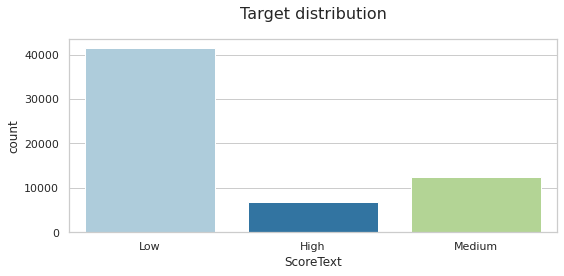

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=compas_df['ScoreText'], ax=ax)

abs_vals = compas_df['ScoreText'].value_counts()
rel_vals = compas_df['ScoreText'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

#ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.tight_layout();

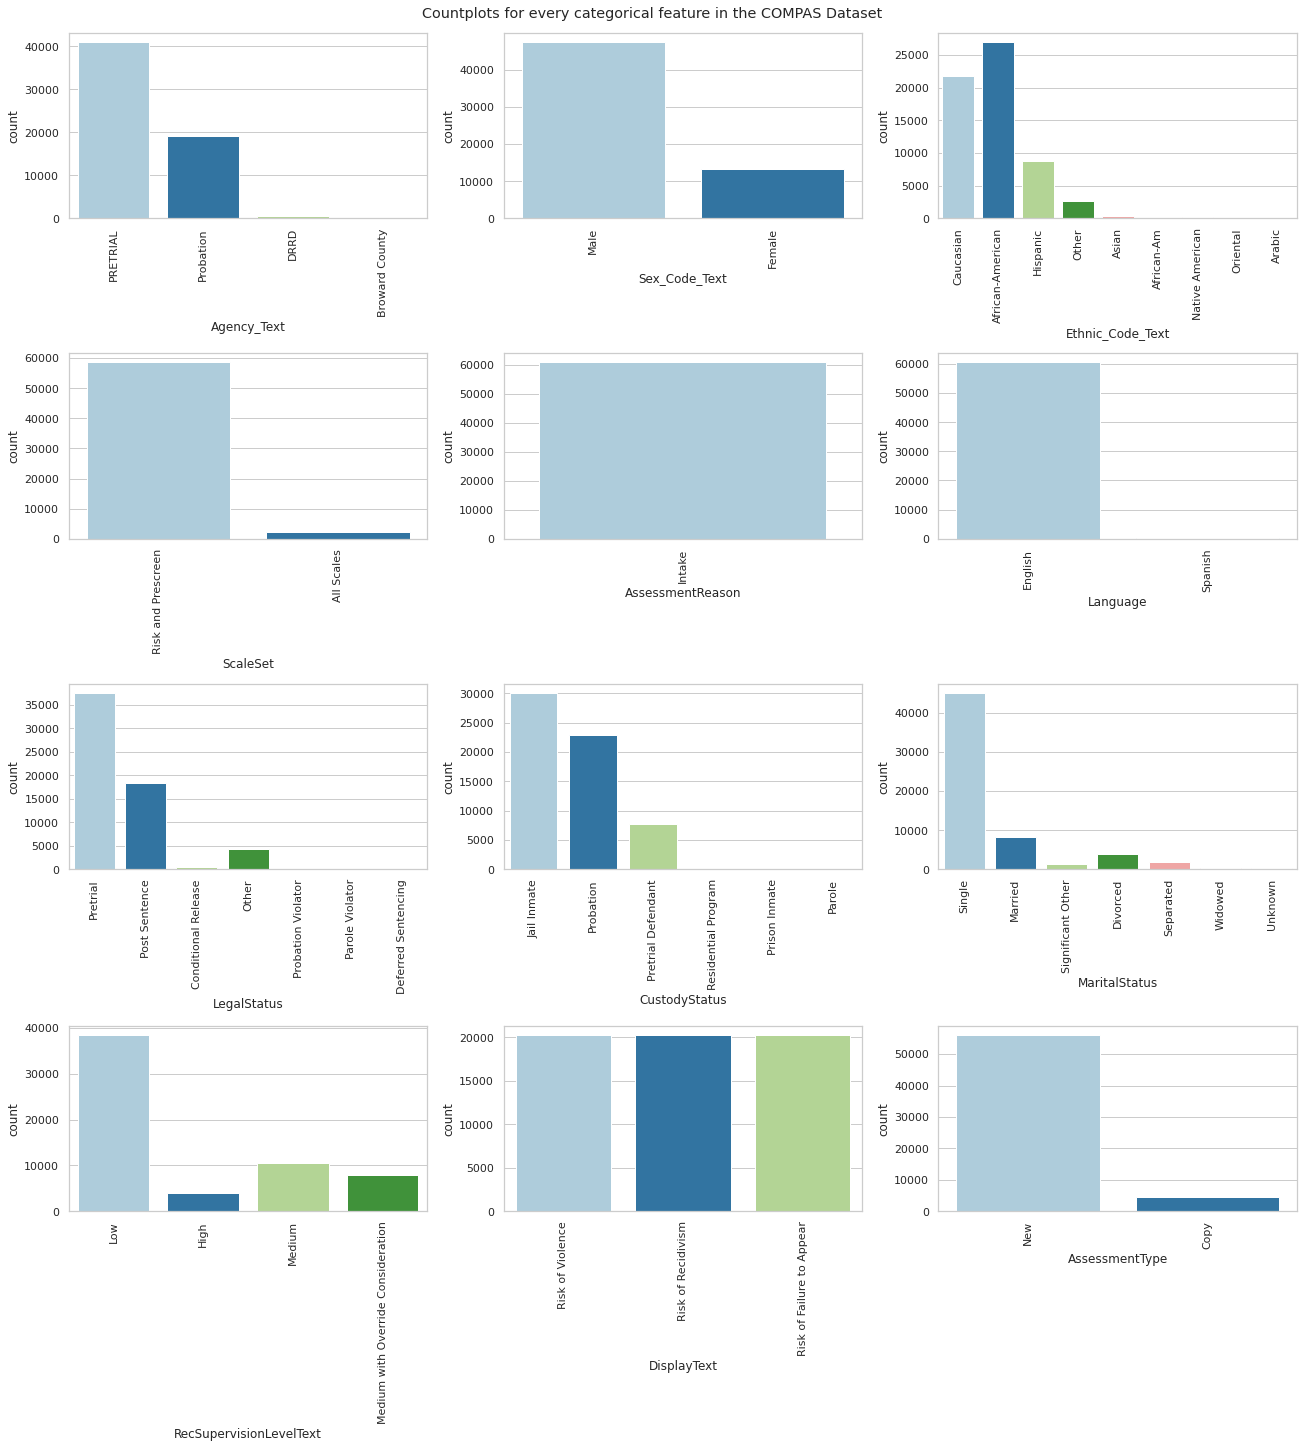

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20), constrained_layout=True)


fig.suptitle('Countplots for every categorical feature in the COMPAS Dataset')

sns.countplot(ax=axes[0, 0], data=compas_df, x='Agency_Text')
sns.countplot(ax=axes[0, 1], data=compas_df, x='Sex_Code_Text')
sns.countplot(ax=axes[0, 2], data=compas_df, x='Ethnic_Code_Text')
sns.countplot(ax=axes[1, 0], data=compas_df, x='ScaleSet')
sns.countplot(ax=axes[1, 1], data=compas_df, x='AssessmentReason')
sns.countplot(ax=axes[1, 2], data=compas_df, x='Language')
sns.countplot(ax=axes[2, 0], data=compas_df, x='LegalStatus')
sns.countplot(ax=axes[2, 1], data=compas_df, x='CustodyStatus')
sns.countplot(ax=axes[2, 2], data=compas_df, x='MaritalStatus')
sns.countplot(ax=axes[3, 0], data=compas_df, x='RecSupervisionLevelText')
sns.countplot(ax=axes[3, 1], data=compas_df, x='DisplayText')
sns.countplot(ax=axes[3, 2], data=compas_df, x='AssessmentType')

for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

## Bivariate Analysis

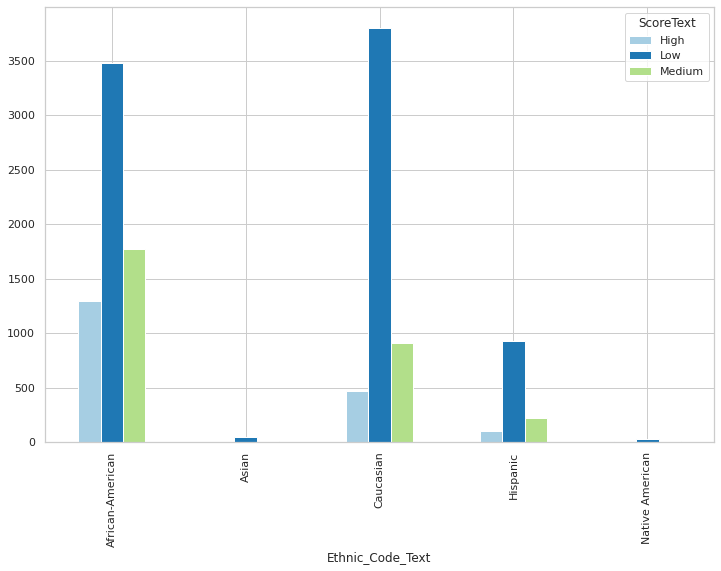

In [25]:
text_by_race = compas_df.groupby(['Ethnic_Code_Text', 'ScoreText'], sort=True).size()
text_by_race.unstack().plot.bar(stacked=False)

In [32]:
text_by_race = compas_df.groupby(['Ethnic_Code_Text', 'ScoreText'], sort=True).size().reset_index()
text_by_race = text_by_race.rename(columns={0:'Count'})
text_by_race[['Count']] = text_by_race[['Count']].apply(pd.to_numeric)
gb = compas_df.groupby(['Ethnic_Code_Text']).size().reset_index()
gb_d = gb.set_index('Ethnic_Code_Text').to_dict().get(0)
text_by_race['Count_Percentage'] = text_by_race.apply(lambda x: ((int(x['Count'])/int(gb_d.get(x['Ethnic_Code_Text']))) * 100), axis=1)
text_by_race

,Ethnic_Code_Text,ScoreText,Count,Count_Percentage
0,African-American,High,1295,19.789120
1,African-American,Low,3481,53.193765
2,African-American,Medium,1768,27.017115
3,Asian,High,3,5.555556
4,Asian,Low,44,81.481481
5,Asian,Medium,7,12.962963
6,Caucasian,High,469,9.057551
7,Caucasian,Low,3800,73.387408
8,Caucasian,Medium,909,17.555041
9,Hispanic,High,99,7.939054


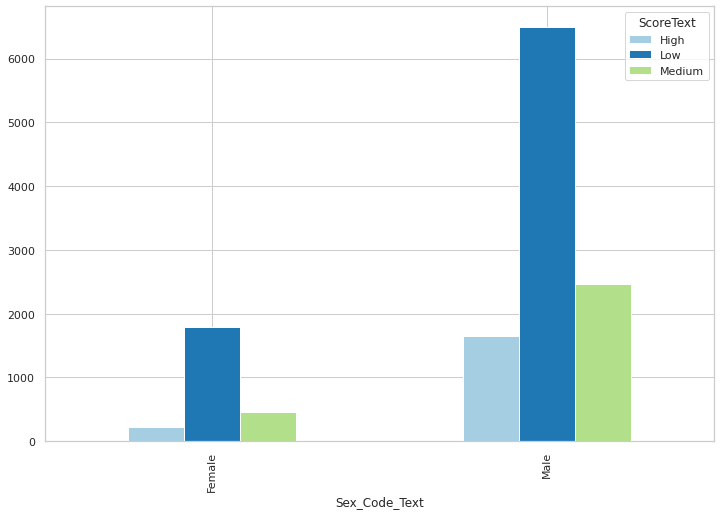

In [37]:
text_by_sex = compas_df.groupby(['Sex_Code_Text', 'ScoreText'], sort=True).size()
text_by_sex.unstack().plot.bar(stacked=False)

In [38]:
text_by_sex = compas_df.groupby(['Sex_Code_Text', 'ScoreText'], sort=True).size().reset_index()
text_by_sex = text_by_sex.rename(columns={0:'Count'})
text_by_sex[['Count']] = text_by_sex[['Count']].apply(pd.to_numeric)
gb = compas_df.groupby(['Sex_Code_Text']).size().reset_index()
gb_d = gb.set_index('Sex_Code_Text').to_dict().get(0)
text_by_sex['Count_Percentage'] = text_by_sex.apply(lambda x: ((int(x['Count'])/int(gb_d.get(x['Sex_Code_Text']))) * 100), axis=1)
text_by_sex

,Sex_Code_Text,ScoreText,Count,Count_Percentage
0,Female,High,225,9.109312
1,Female,Low,1783,72.186235
2,Female,Medium,462,18.704453
3,Male,High,1652,15.579027
4,Male,Low,6495,61.250472
5,Male,Medium,2457,23.170502


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


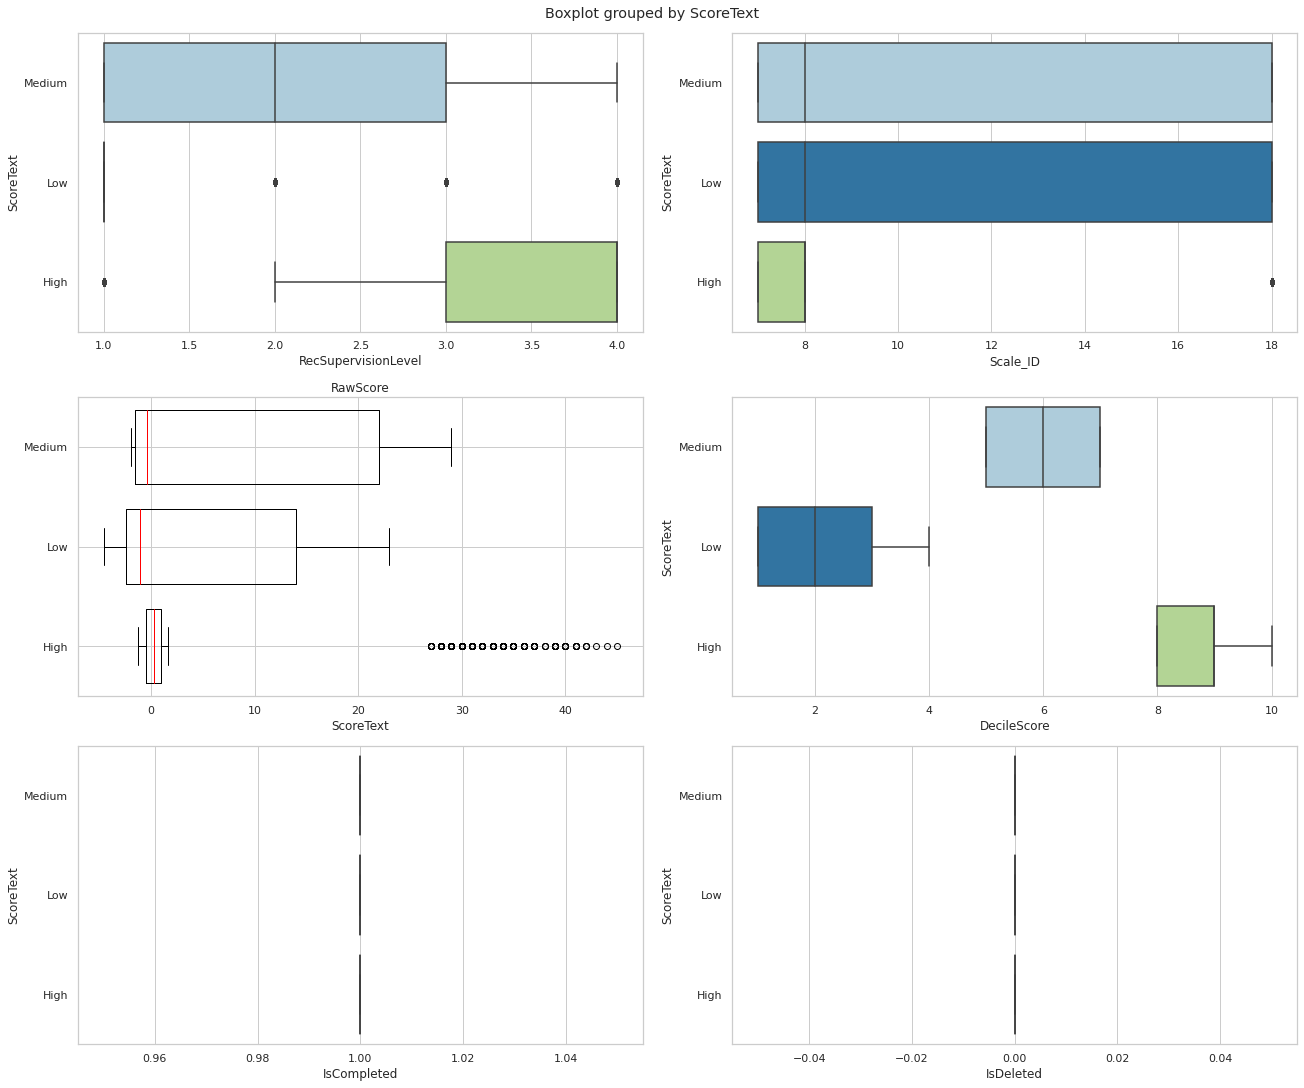

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15), constrained_layout=True)
color = dict(boxes='black', whiskers='black', medians='red', caps='black')

fig.suptitle('Boxplots for some of the numeric features in the COMPAS Dataset')

sns.boxplot(ax=axes[0,0], x='RecSupervisionLevel', y='ScoreText', data=compas_df)
sns.boxplot(ax=axes[0,1], x='Scale_ID', y='ScoreText', data=compas_df)
compas_df.boxplot(ax=axes[1,0], column='RawScore', by='ScoreText', vert=False, widths=0.75, color=color,whiskerprops = dict(linestyle='-',linewidth=1.0
, color='black'))
sns.boxplot(ax=axes[1,1], x='DecileScore', y='ScoreText', data=compas_df)
sns.boxplot(ax=axes[2,0], x='IsCompleted', y='ScoreText', data=compas_df)
sns.boxplot(ax=axes[2,1], x='IsDeleted', y='ScoreText', data=compas_df)

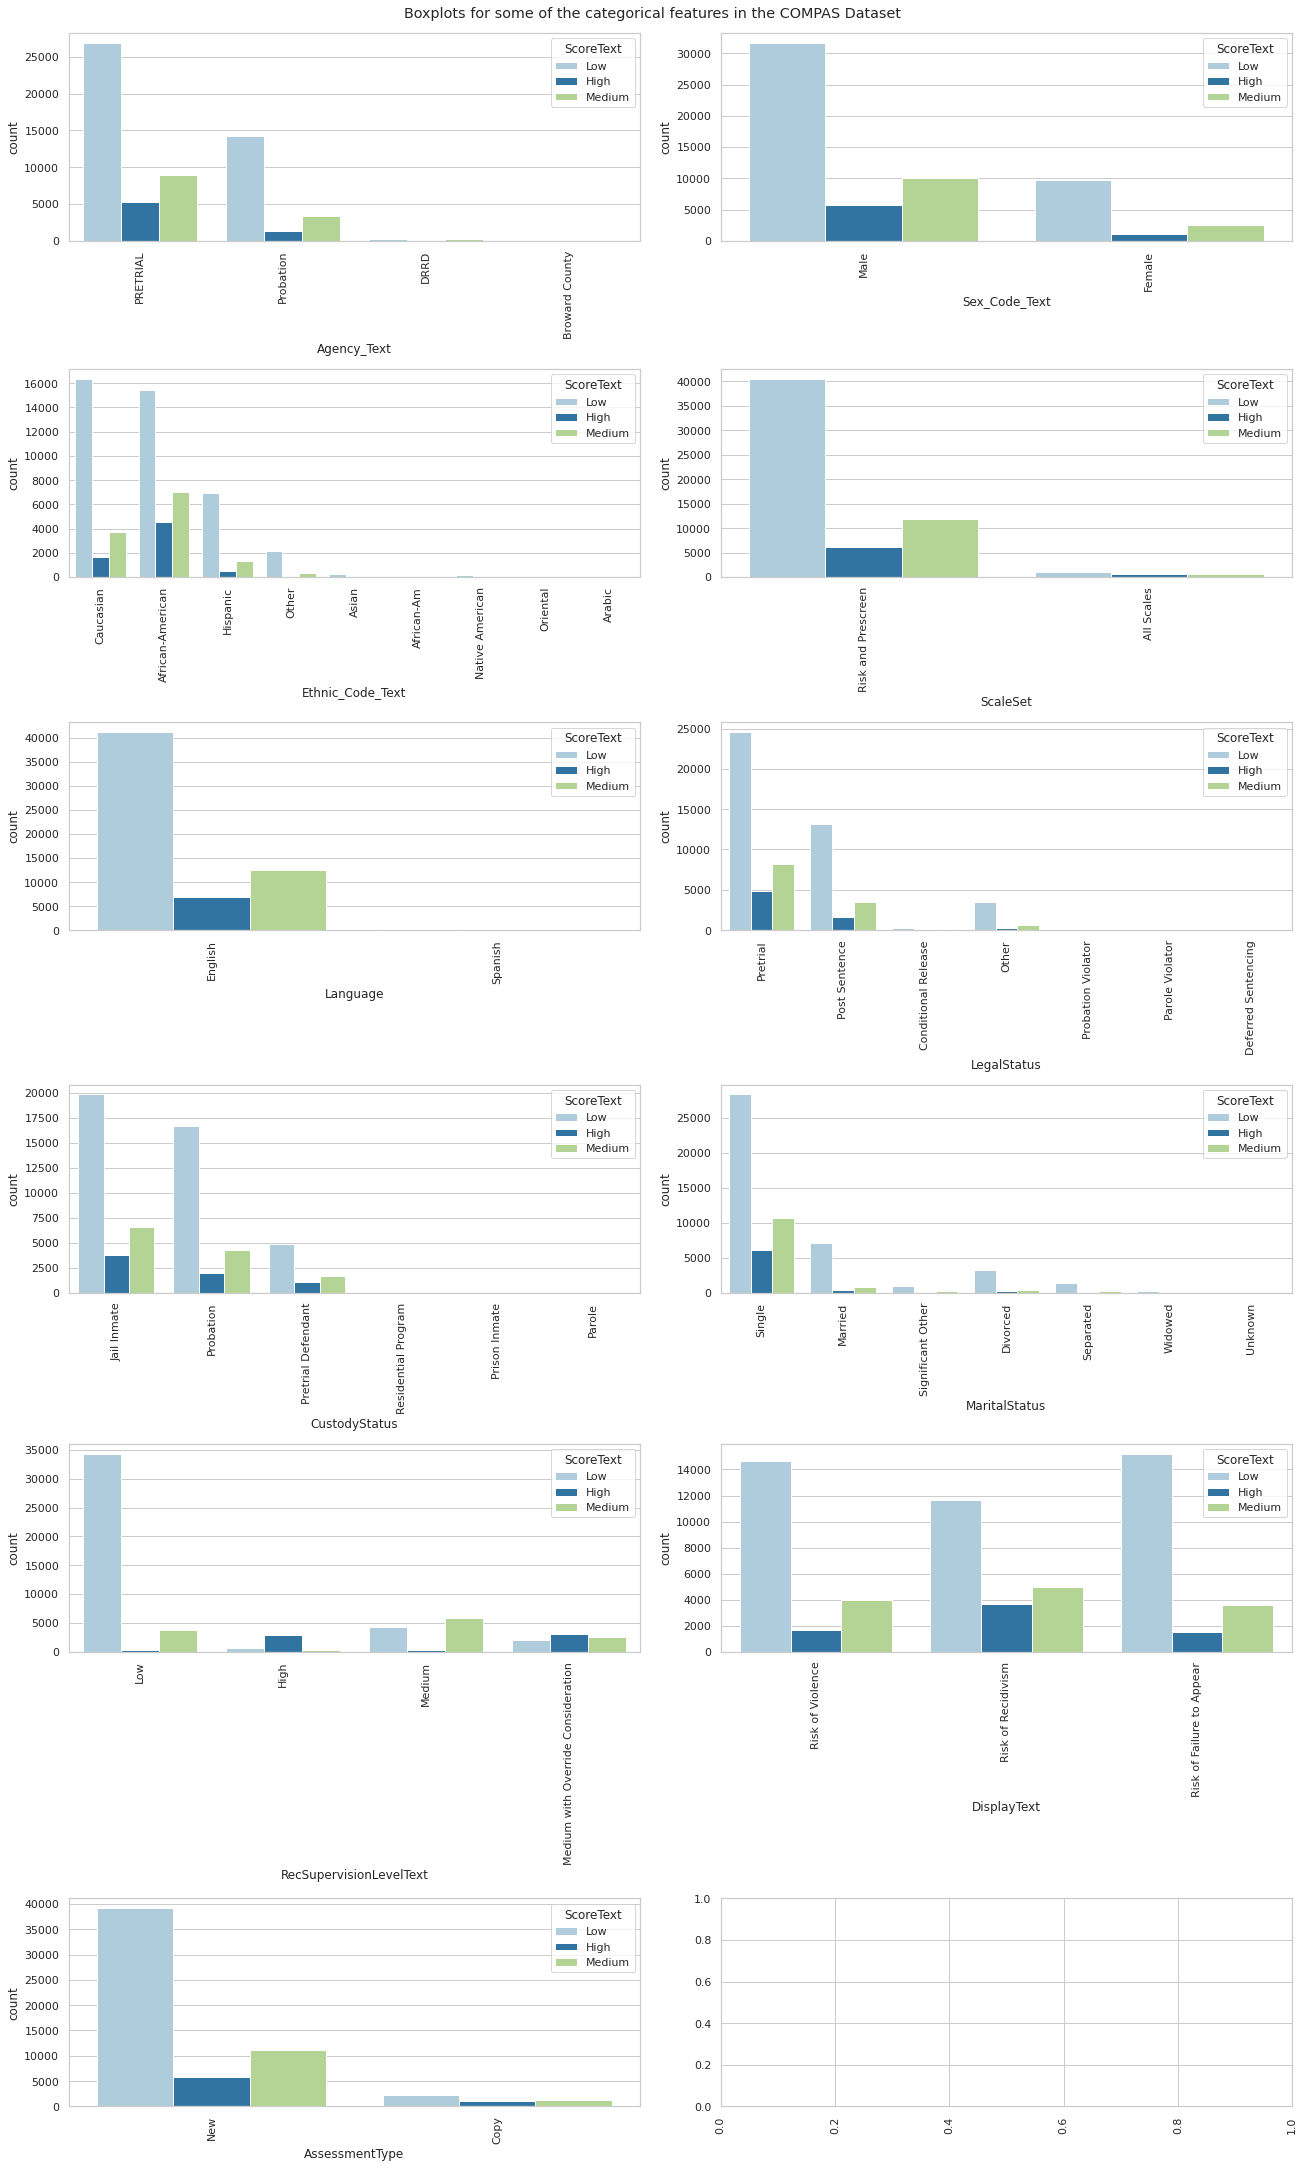

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(18, 30), constrained_layout=True)
total = float(len(compas_df))

fig.suptitle('Boxplots for some of the categorical features in the COMPAS Dataset')

sns.countplot(ax=axes[0,0], x="Agency_Text", hue="ScoreText", data=compas_df)
sns.countplot(ax=axes[0,1], x="Sex_Code_Text", hue="ScoreText", data=compas_df)
sns.countplot(ax=axes[1,0], x="Ethnic_Code_Text", hue="ScoreText", data=compas_df)
sns.countplot(ax=axes[1,1], x="ScaleSet", hue="ScoreText", data=compas_df,)
sns.countplot(ax=axes[2,0], x="Language", hue="ScoreText", data=compas_df)
sns.countplot(ax=axes[2,1], x="LegalStatus", hue="ScoreText", data=compas_df,)
sns.countplot(ax=axes[3,0], x="CustodyStatus", hue="ScoreText", data=compas_df,)
sns.countplot(ax=axes[3,1], x="MaritalStatus", hue="ScoreText", data=compas_df)
sns.countplot(ax=axes[4,0], x="RecSupervisionLevelText", hue="ScoreText", data=compas_df,)
sns.countplot(ax=axes[4,1], x="DisplayText", hue="ScoreText", data=compas_df,)
sns.countplot(ax=axes[5,0], x="AssessmentType", hue="ScoreText", data=compas_df)

for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

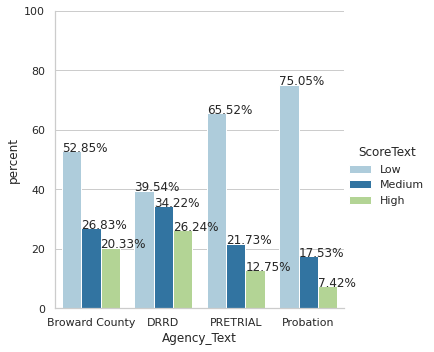

In [ ]:
x,y = 'Agency_Text', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

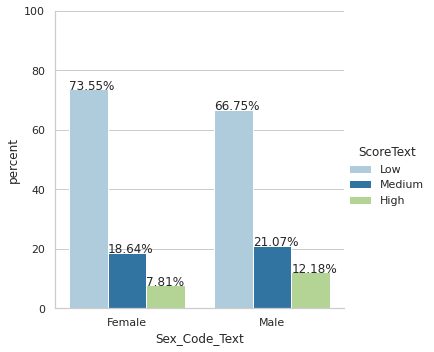

In [ ]:
x,y = 'Sex_Code_Text', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

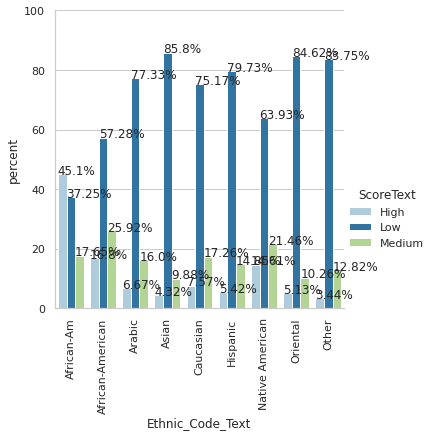

In [ ]:
x,y = 'Ethnic_Code_Text', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

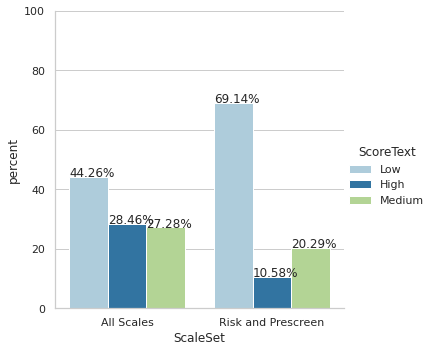

In [ ]:
x,y = 'ScaleSet', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

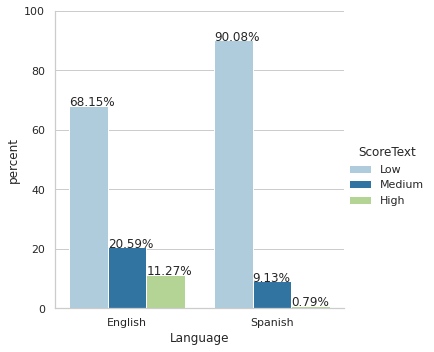

In [ ]:
x,y = 'Language', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


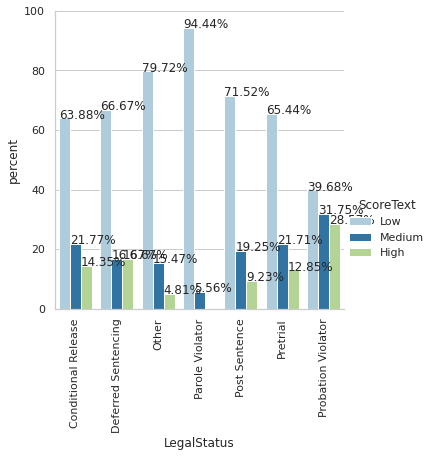

In [ ]:
x,y = 'LegalStatus', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

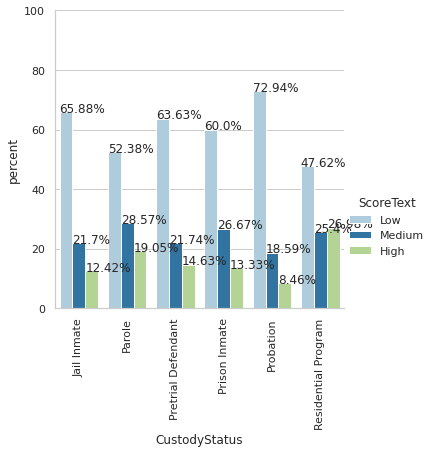

In [ ]:
x,y = 'CustodyStatus', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

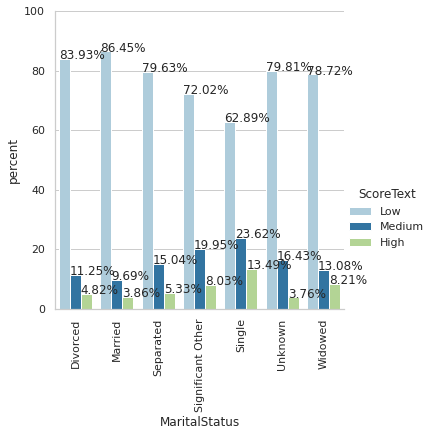

In [ ]:
x,y = 'MaritalStatus', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

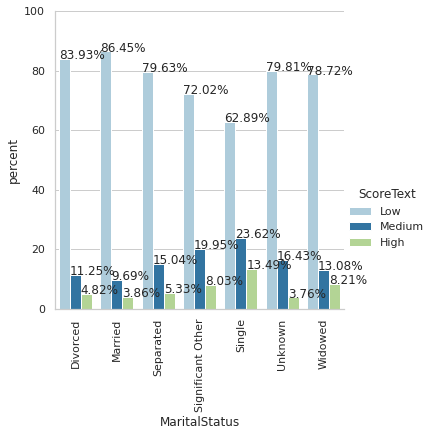

In [ ]:
x,y = 'MaritalStatus', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

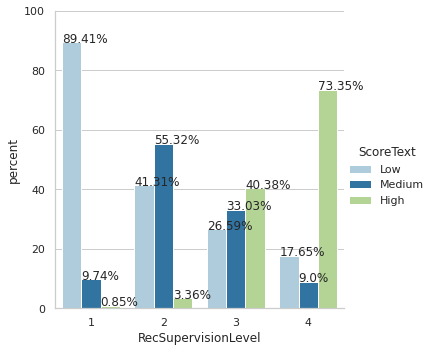

In [ ]:
x,y = 'RecSupervisionLevel', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

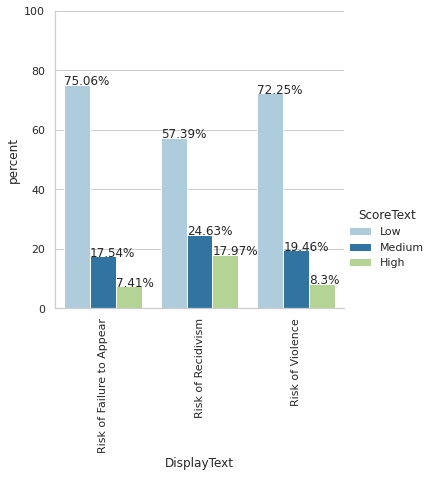

In [ ]:
x,y = 'DisplayText', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

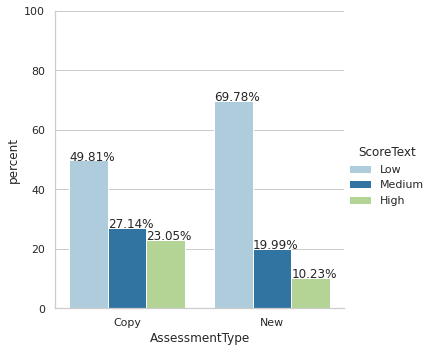

In [ ]:
x,y = 'AssessmentType', 'ScoreText'

df1 = compas_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## T-Test Hypothesis testing for continuous variables

In [ ]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those who win the different risk level groups.
# Alternate Hypothesis : there is difference in Mean of those who win the different risk level groups.

data = compas_df[(np.abs(stats.zscore(compas_df["ScaleSet_ID"])) < 3)]

income_1 = data[compas_df['ScoreText']=='yes']["ScaleSet_ID"]
income_0 = data[compas_df['ScoreText']=='no']["ScaleSet_ID"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ValueError: ignored

In [ ]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those who were accepted for a bank loan and those who weren't.
# Alternate Hypothesis : there is difference in Mean of those who were accepted for a bank loan and those who weren't.

data = bank_df[(np.abs(stats.zscore(bank_df["duration"])) < 3)]

income_1 = data[bank_df['y']=='yes']["duration"]
income_0 = data[bank_df['y']=='no']["duration"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

In [ ]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those who were accepted for a bank loan and those who weren't.
# Alternate Hypothesis : there is difference in Mean of those who were accepted for a bank loan and those who weren't.

data = bank_df[(np.abs(stats.zscore(bank_df["campaign"])) < 3)]

income_1 = data[bank_df['y']=='yes']["campaign"]
income_0 = data[bank_df['y']=='no']["campaign"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

In [ ]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those who were accepted for a bank loan and those who weren't.
# Alternate Hypothesis : there is difference in Mean of those who were accepted for a bank loan and those who weren't.

data = bank_df[(np.abs(stats.zscore(bank_df["pdays"])) < 3)]

income_1 = data[bank_df['y']=='yes']["pdays"]
income_0 = data[bank_df['y']=='no']["pdays"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

In [ ]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those who were accepted for a bank loan and those who weren't.
# Alternate Hypothesis : there is difference in Mean of those who were accepted for a bank loan and those who weren't.

data = bank_df[(np.abs(stats.zscore(bank_df["previous"])) < 3)]

income_1 = data[bank_df['y']=='yes']["previous"]
income_0 = data[bank_df['y']=='no']["previous"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

In [ ]:
m

## Chi-Squared Hypothesis testing for categorical varibles

In [ ]:
# contingency table for ethnic code
c_t = pd.crosstab(compas_df['Ethnic_Code_Text'].sample(frac=0.002, replace=True, random_state=1),compas_df['ScoreText'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between ethnic code and income.
# Alternate Hypothesis: There is a relationship between ethnic code and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for marital
c_t = pd.crosstab(bank_df['marital'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between marital status and income.
# Alternate Hypothesis: There is a relationship between marital status and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for education
c_t = pd.crosstab(bank_df['education'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between education and income.
# Alternate Hypothesis: There is a relationship between education and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for default
c_t = pd.crosstab(bank_df['default'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between default and income.
# Alternate Hypothesis: There is a relationship between default and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for housing
c_t = pd.crosstab(bank_df['housing'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between housing and income.
# Alternate Hypothesis: There is a relationship between housing and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for loan
c_t = pd.crosstab(bank_df['loan'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between loan and income.
# Alternate Hypothesis: There is a relationship between loan and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for contact
c_t = pd.crosstab(bank_df['contact'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between contact and income.
# Alternate Hypothesis: There is a relationship between contact and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for month
c_t = pd.crosstab(bank_df['month'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between month and income.
# Alternate Hypothesis: There is a relationship between month and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for day of week
c_t = pd.crosstab(bank_df['day_of_week'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between day of week and income.
# Alternate Hypothesis: There is a relationship between day of week and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

In [ ]:
# contingency table for p outcome
c_t = pd.crosstab(bank_df['poutcome'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between p outcome and income.
# Alternate Hypothesis: There is a relationship between p outcome and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

## Multivariate Relationships

In [ ]:
# Correlation among the numeric variables heatmap (requires pre-processing)